In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from google.colab import drive
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import plotly.graph_objects as go
from sklearn.metrics import adjusted_rand_score
from collections import OrderedDict

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Arquivos

In [3]:
path = "drive/My Drive/TCC - Vinícius Franklin - Desenvolvimento de Prótese Ativa Controlada por Sinais EMG Utilizando Classificação com Machine Learning/Testes Dados - EMG/conf_4_ind_elet/Features Datasets/"

In [4]:
arquivos_emg = {
    # Movimentos dedos esq/dir – 5s
    "emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv": "Clusters_Kmeans",
    "emg__modulo_mov_dedos_esq_dir_5s_2.csvFeatures.csv": "Clusters_Kmeans",
    "emg__modulo_mov_dedos_esq_dir_5s_3.csvFeatures.csv": "Clusters_Kmeans",
    "emg__modulo_mov_dedos_esq_dir_5s_4.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_mov_dedos_esq_dir_5s_5.csvFeatures.csv": "Clusters_GMM",

    # Indicador – 10s
    "emg__modulo_indicador_10s_1.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_indicador_10s_2.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_indicador_10s_3.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_indicador_10s_4.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_indicador_10s_5.csvFeatures.csv": "Clusters_Kmeans",
    "emg__modulo_indicador_10s_6.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_indicador_10s_7.csvFeatures.csv": "Clusters_GMM",

    # Indicador – 5s
    "emg__modulo_indicador_5s_1.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_indicador_5s_2.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_indicador_5s_3.csvFeatures.csv": "Clusters_Kmeans",
    "emg__modulo_indicador_5s_4.csvFeatures.csv": "Clusters_GMM",
    "emg__modulo_indicador_5s_5.csvFeatures.csv": "Clusters_GMM",

    # Estado fixo – Label manual
    "emg__modulo_mao_aberta_1.csvFeatures.csv": "Label",
    "emg__modulo_mao_aberta_2.csvFeatures.csv": "Label",
    "emg__modulo_mao_aberta_3.csvFeatures.csv": "Label",
    "emg__modulo_mao_aberta_4.csvFeatures.csv": "Label",
    "emg__modulo_mao_aberta_5.csvFeatures.csv": "Label",

    "emg__modulo_indicador_fechado_1.csvFeatures.csv": "Label",
    "emg__modulo_indicador_fechado_2.csvFeatures.csv": "Label",
    "emg__modulo_indicador_fechado_3.csvFeatures.csv": "Label",
    "emg__modulo_indicador_fechado_4.csvFeatures.csv": "Label",
    "emg__modulo_indicador_fechado_5.csvFeatures.csv": "Label"
}


In [5]:

tipo_cluster = list(OrderedDict.fromkeys(arquivos_emg.values()))


df_features_geral = pd.DataFrame()

for arquivo in list(arquivos_emg.keys()):
  df_emg_features = pd.read_csv(path+arquivo)
  colunas = list(df_emg_features.columns)
  cluster = arquivos_emg[arquivo]
  copy_tipo_cluster = tipo_cluster[:]
  copy_tipo_cluster.pop(copy_tipo_cluster.index(cluster))
  for c in copy_tipo_cluster:
    if c in colunas:
      colunas.pop(colunas.index(c))
    else:
      pass
  df_emg_features = df_emg_features[colunas]
  print(f"{arquivo} -> {cluster}")
  df_emg_features.rename(columns={cluster:"Contração"}, inplace=True)
  df_features_geral = pd.concat([df_emg_features,df_features_geral],axis=0,ignore_index=True)



emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_mov_dedos_esq_dir_5s_2.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_mov_dedos_esq_dir_5s_3.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_mov_dedos_esq_dir_5s_4.csvFeatures.csv -> Clusters_GMM
emg__modulo_mov_dedos_esq_dir_5s_5.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_10s_1.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_10s_2.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_10s_3.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_10s_4.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_10s_5.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_indicador_10s_6.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_10s_7.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_5s_1.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_5s_2.csvFeatures.csv -> Clusters_GMM
emg__modulo_indicador_5s_3.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_indicador_5s_4.csvFeatures.csv -> Cluster

In [6]:
df_features_geral.head(5)

,amp_en,rms,zcr,Band Energy Ratio,Spectral Centroid,Bandwidth,f0,Mag_norm_f0,bp_50_150,bp_150_200,...,mdf,mnf,mav,wl,mean_v,std_v,var_v,ssc,mavs,Contração
0,-58.647360,7.580544,0.226295,0.285414,208.910404,130.516370,47.216184,1.369390,0.231912,0.103601,...,113.613942,155.937826,4.265099,3186.387838,-0.000062,7.580544,57.464644,422.0,4.262648,1.0
1,-32.900991,6.007625,0.242913,0.391438,206.270369,132.234519,57.544724,0.943481,0.206021,0.133204,...,140.173045,170.366514,3.784199,2967.300583,0.000097,6.007625,36.091558,432.0,3.676662,1.0
2,-30.147016,5.734576,0.232160,0.613021,204.826602,135.509665,35.412138,0.814560,0.182153,0.129191,...,174.109677,190.807233,3.475774,2893.184417,0.000044,5.734576,32.885367,429.0,3.504514,1.0
3,-30.721964,6.072506,0.233138,0.406857,215.327755,137.302946,39.838655,0.919365,0.218419,0.115935,...,151.977091,172.966107,3.698174,2953.349309,0.000058,6.072506,36.875334,423.0,3.719167,1.0
4,-46.682991,6.518114,0.227273,0.294207,224.960937,140.324816,44.265172,1.046572,0.189225,0.162982,...,134.271022,161.842137,3.937616,3039.538714,0.000153,6.518114,42.485809,408.0,3.994734,1.0


In [7]:
len(df_features_geral)

11064

## Ler Dados

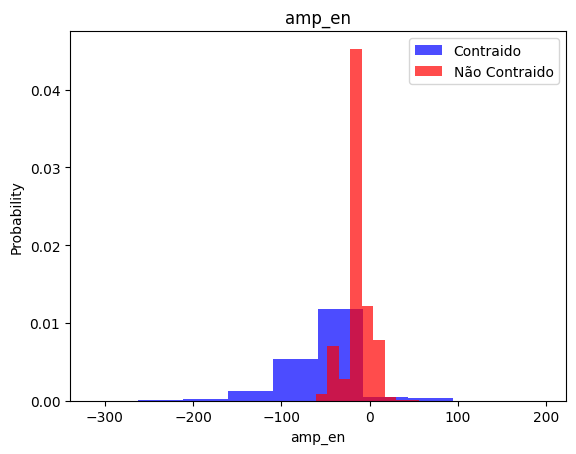

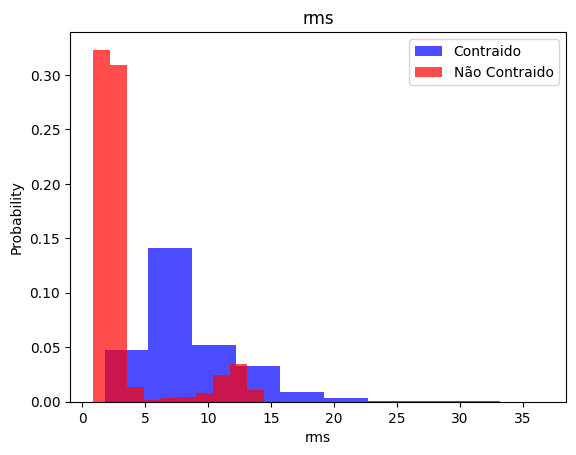

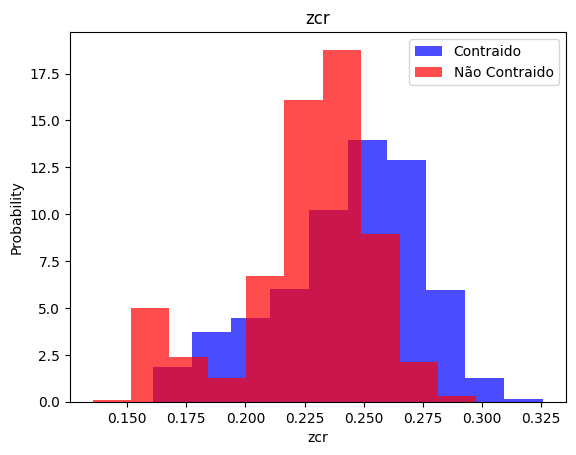

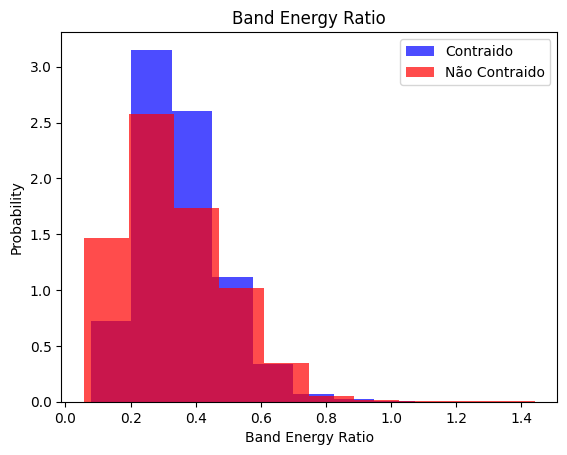

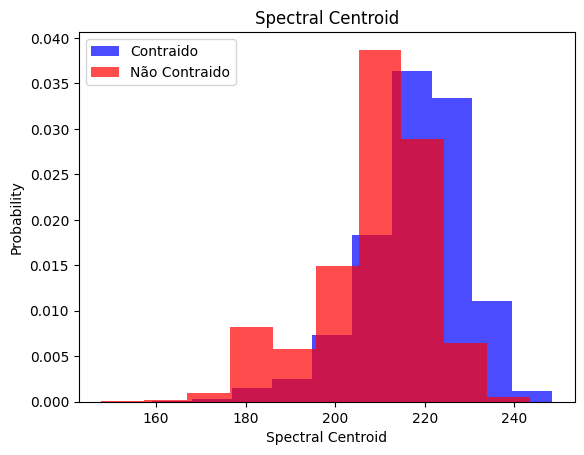

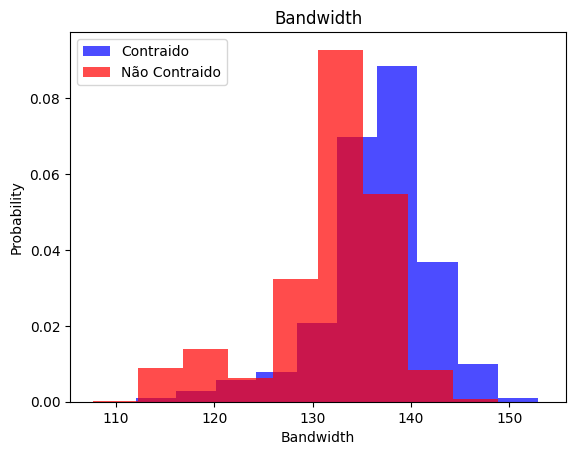

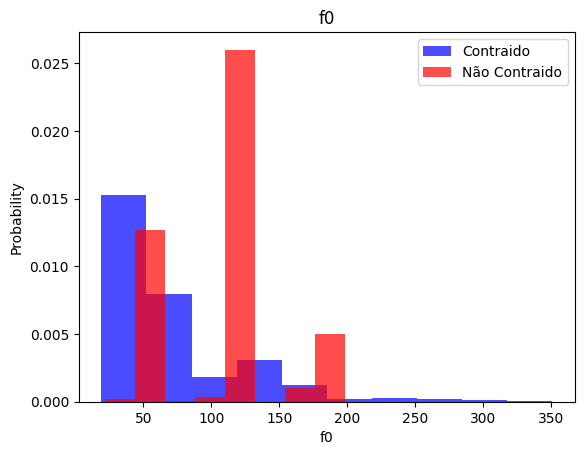

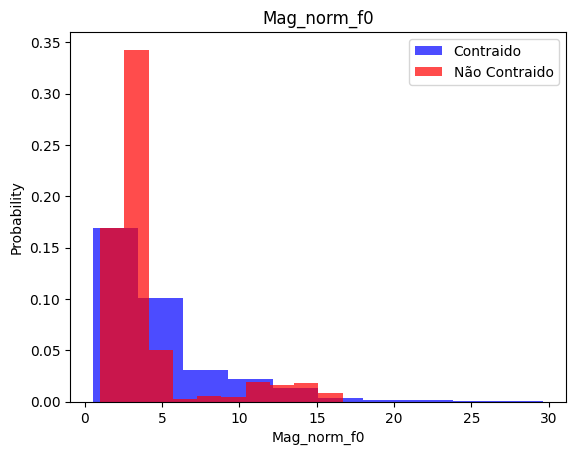

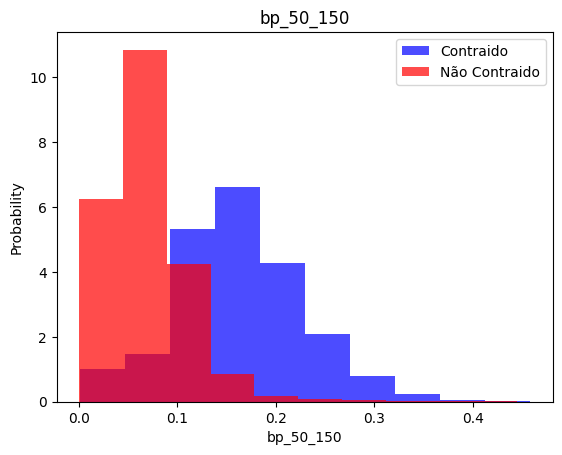

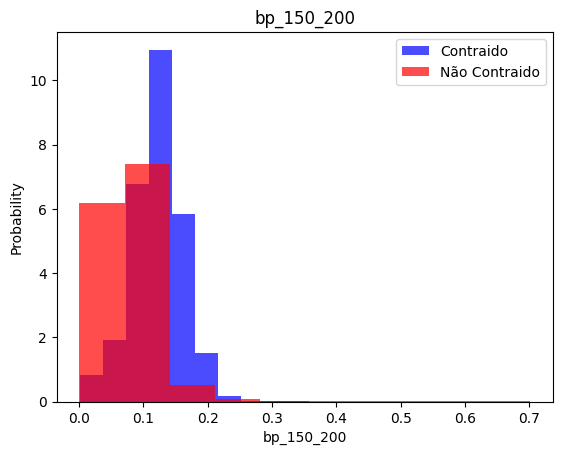

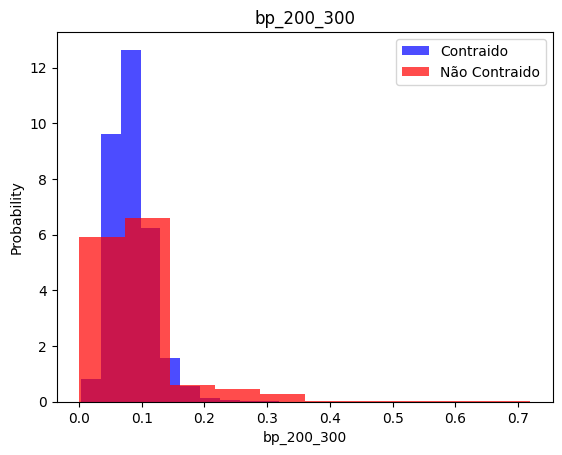

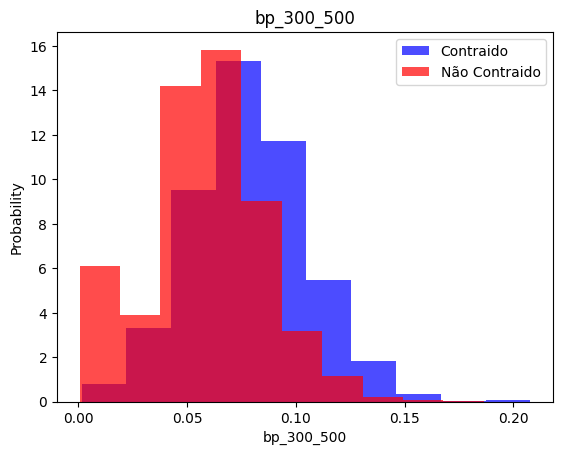

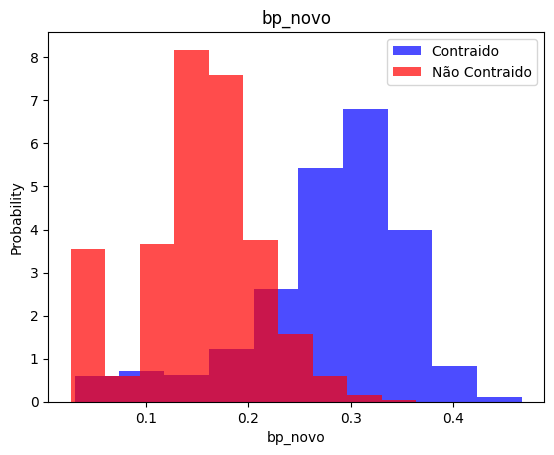

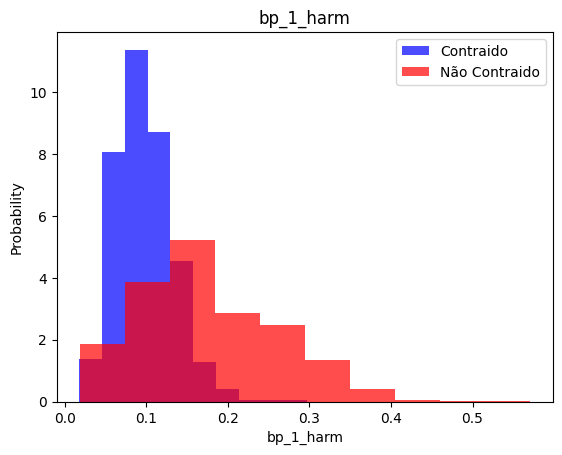

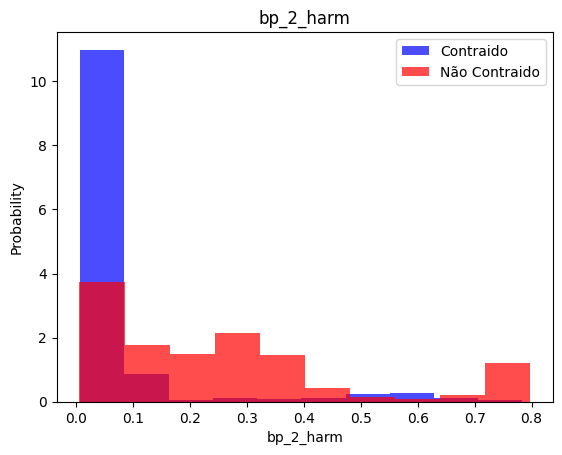

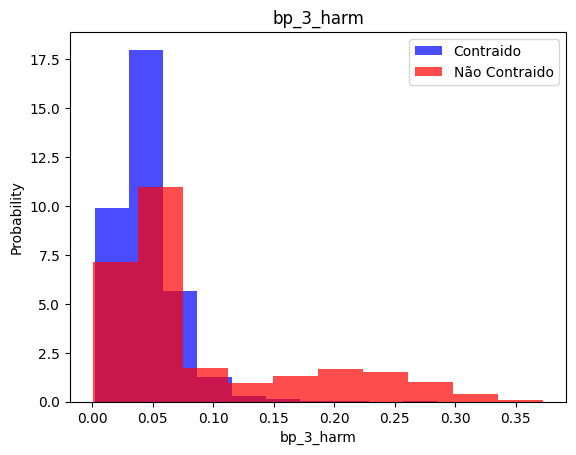

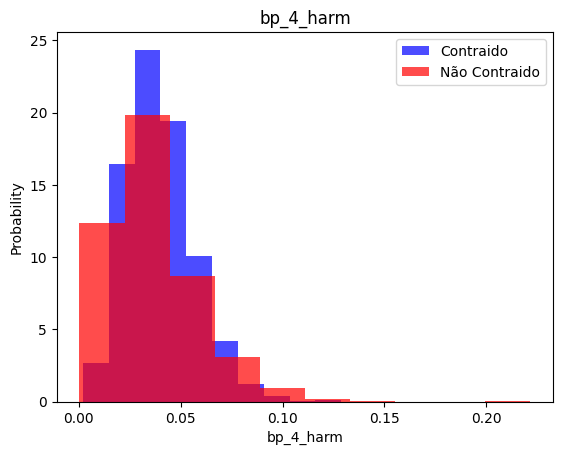

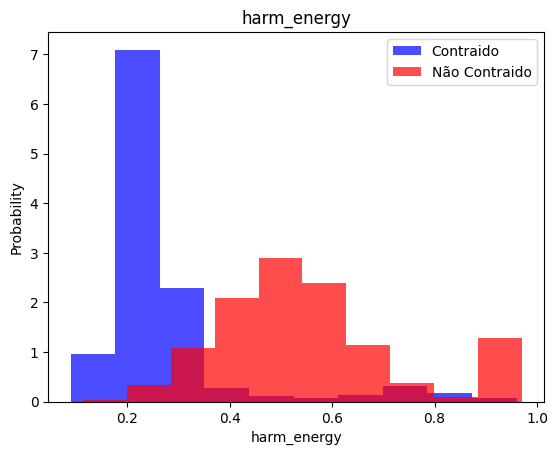

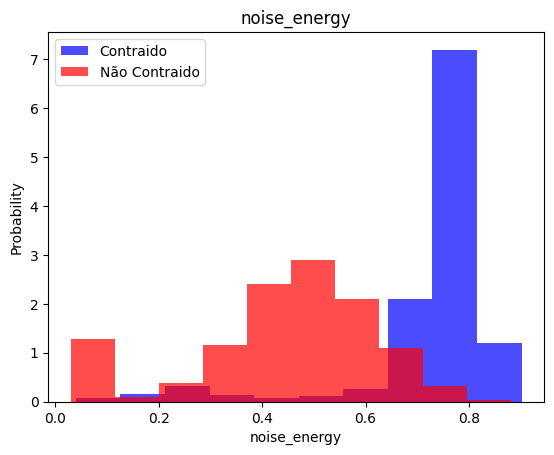

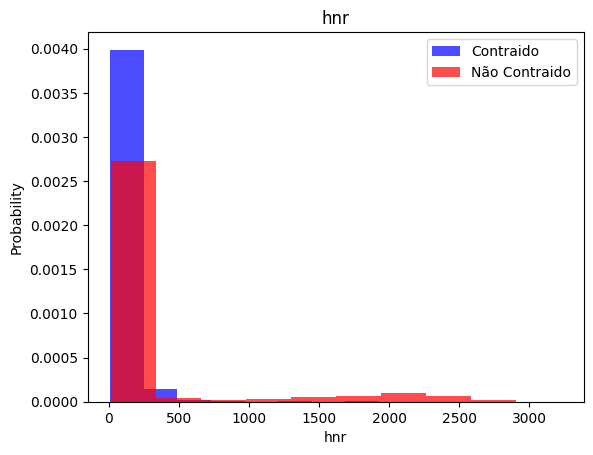

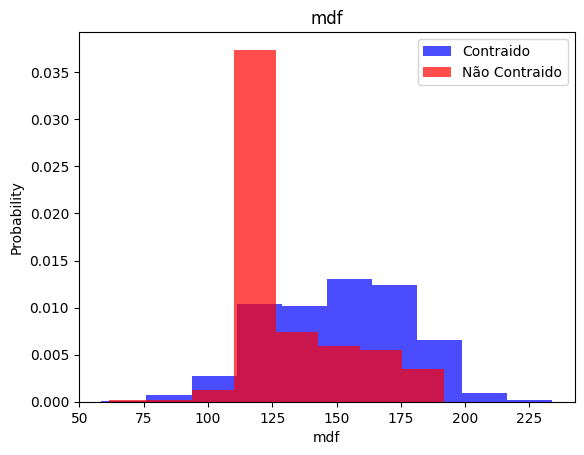

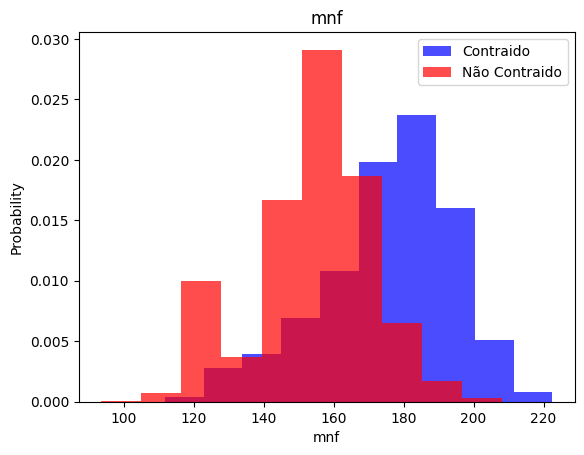

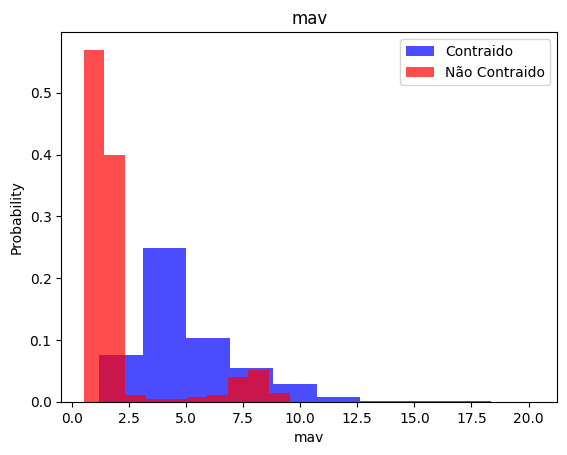

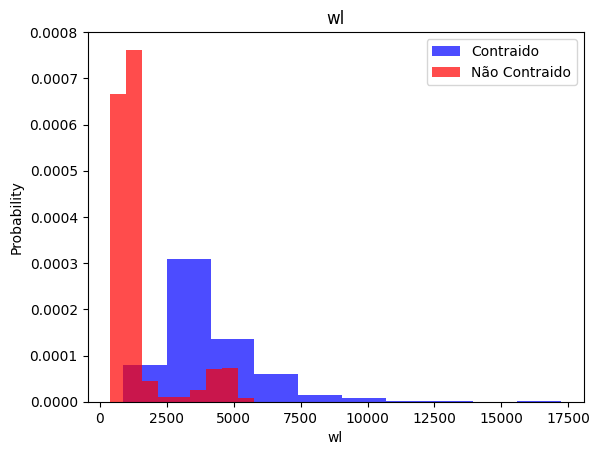

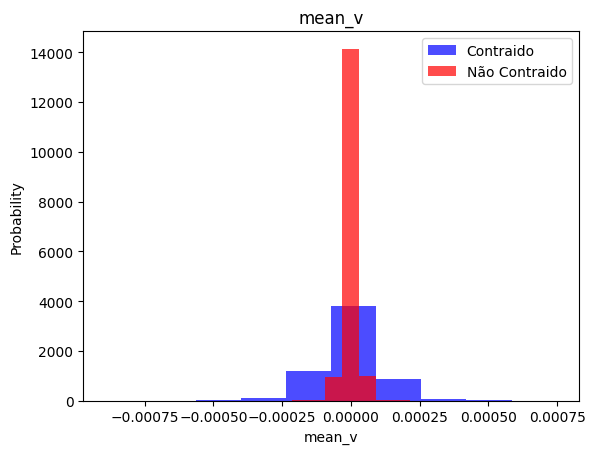

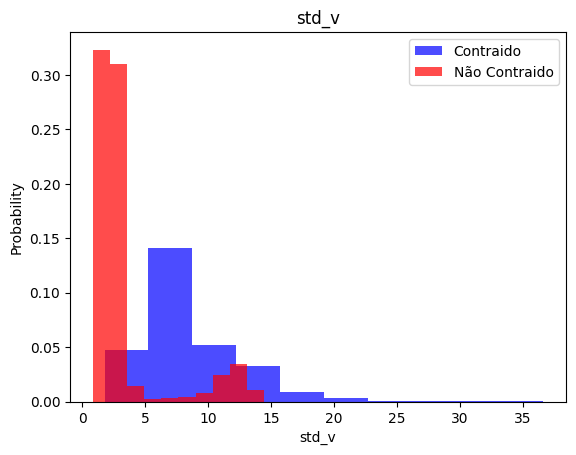

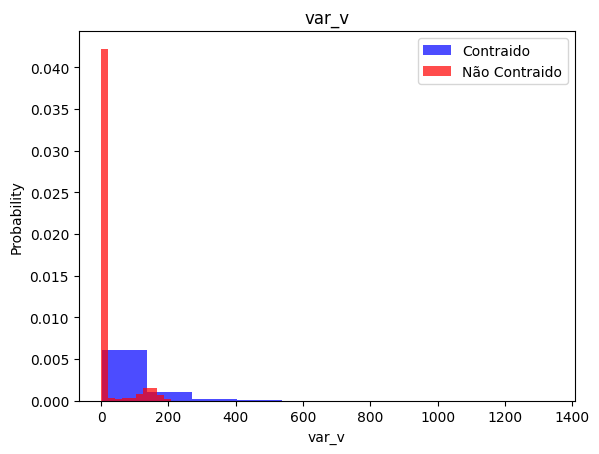

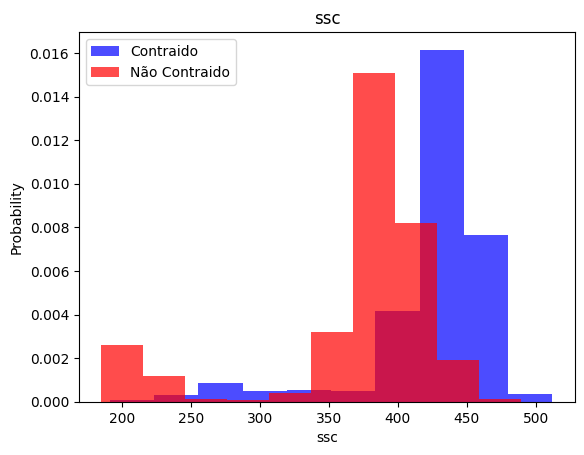

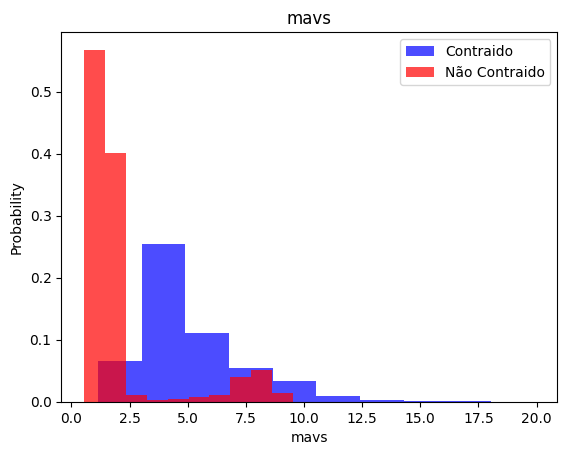

In [8]:
for label in df_features_geral.columns[:-1]:
    plt.hist(df_features_geral[df_features_geral['Contração']==1][label],color='blue',label='Contraido',alpha=0.7,density=True)
    plt.hist(df_features_geral[df_features_geral['Contração']==0][label],color='red',label='Não Contraido',alpha=0.7,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [9]:
df_features_geral.corr()['Contração']

,Contração
amp_en,-0.605048
rms,0.593880
zcr,0.263367
Band Energy Ratio,0.045937
Spectral Centroid,0.342402
Bandwidth,0.364556
f0,-0.449176
Mag_norm_f0,0.074853
bp_50_150,0.664875
bp_150_200,0.432422


In [10]:

fig = px.imshow(df_features_geral.corr())
fig.show()

## Colunas

In [11]:
df_features_geral.columns

Index(['amp_en', 'rms', 'zcr', 'Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_novo', 'bp_1_harm', 'bp_2_harm',
       'bp_3_harm', 'bp_4_harm', 'harm_energy', 'noise_energy', 'hnr', 'mdf',
       'mnf', 'mav', 'wl', 'mean_v', 'std_v', 'var_v', 'ssc', 'mavs',
       'Contração'],
      dtype='object')

In [12]:
time_features = ['amp_en', 'rms', 'zcr','mav', 'wl',
       'mean_v', 'std_v', 'var_v', 'ssc', 'mavs', 'Contração']

frequency_features = ['Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_1_harm', 'bp_2_harm', 'bp_3_harm',
       'harm_energy', 'noise_energy', 'hnr', 'mdf', 'mnf','Contração']

In [13]:
df_features_geral = df_features_geral[:]

## Train Test Split

In [14]:
cont = len(df_features_geral[df_features_geral["Contração"] == 1])
n_cont = len(df_features_geral[df_features_geral["Contração"] == 0])

print(f"Distribuição do Dataset: \nContraído: {cont}\nNão Contraído {n_cont}")

Distribuição do Dataset: 
Contraído: 4182
Não Contraído 6882


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df_features_geral[df_features_geral.columns[:-1]],  # todas as colunas exceto a última → features
    df_features_geral[df_features_geral.columns[-1]],   # última coluna → labels
    test_size=0.80,
    random_state=42
)



No seu trabalho de classificação de movimentos a partir de sinais EMG, você reúne diversos datasets provenientes de sessões, protocolos e condições experimentais diferentes. Ao concatenar esses arquivos, você cria um conjunto de dados amplo e heterogêneo, que representa múltiplos cenários fisiológicos e de coleta.

Quando você treina o modelo usando apenas 20% dos dados e testa nos 80% restantes, o teste funciona como uma avaliação em “dados realmente novos”, já que os cenários presentes no teste são diferentes dos usados no treino. Isso simula muito bem a aplicação do modelo em um dataset externo ou em uma nova sessão de coleta. O fato de o desempenho permanecer praticamente igual ao treinar com 80% dos dados mostra que o modelo não está decorando o conjunto de treino e está aprendendo padrões musculares robustos e generalizáveis.

Além disso, esse comportamento tende a ser uma boa indicação de que o modelo não apresentará overfitting, pois ele mantém alta performance mesmo quando exposto a uma grande variedade de cenários que não foram vistos durante o treino. Isso reforça a robustez do modelo e aumenta a confiança de que ele generalizará bem em situações reais. Como bônus, treinar com menos dados reduz custo computacional e facilita a implementação em sistemas embarcados sem perda de desempenho.








## Scale Data

$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


$$
X_{\text{scaled}} = X_{\text{std}} \times (b - a) + a
$$

onde

$$
X_{\text{std}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$



A aplicação do numpy para a função criada para min max scaler, representa a isso em algebra linear:
$$
X_{\text{scaled}} = \frac{X - \mathbf{1}_n \min^T}{\mathbf{1}_n (\max - \min)^T}
$$


In [16]:
def min_max_scaler(X, max_values, min_values):
    # aplica o min-max manualmente com base nos valores de treino
    # verificando o resultado da certinho igual ao MinMaxScaler
    X_scaled = (X - min_values) / (max_values - min_values)
    return X_scaled

def scale_dataset(X, y, oversample=False, Train=False, max_values=None, min_values=None):
    if Train:
        # calcula os valores max e min para cada coluna (feature)
        max_values = np.max(X, axis=0)
        min_values = np.min(X, axis=0)

        # aplica MinMaxScaler do sklearn (equivalente à fórmula acima)
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        # opcional: oversampling
        if oversample:
            ros = RandomOverSampler()
            X_scaled, y = ros.fit_resample(X_scaled, y)

        df = np.hstack((X_scaled, np.reshape(y, (-1, 1))))

        X_scaled, y = shuffle(X_scaled, y, random_state=42)


        return df, X_scaled, y, max_values, min_values

    else:
        # normaliza o conjunto de teste usando os valores do treino
        X_scaled = min_max_scaler(X, max_values, min_values)

        if oversample:
            ros = RandomOverSampler()
            X_scaled, y = ros.fit_resample(X_scaled, y)

        df = np.hstack((X_scaled, np.reshape(y, (-1, 1))))

        X_scaled, y = shuffle(X_scaled, y, random_state=42)


        return df, X_scaled, y


In [17]:
train, X_train_array, y_train_array, max_values, min_values = scale_dataset(
    X=X_train.values, y=y_train.values, oversample=True, Train=True
)

test, X_test_array, y_test_array = scale_dataset(
    X=X_test.values, y=y_test.values, oversample=False,
    max_values=max_values, min_values=min_values
)


In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Exemplo simples (você pode trocar pelo seu X_train.values)
X = X_train.values

# --- Seu algoritmo manual ---
max_values = np.max(X, axis=0)
min_values = np.min(X, axis=0)
X_manual = (X - min_values) / (max_values - min_values)

# --- Scikit-learn ---
scaler = MinMaxScaler()
X_sklearn = scaler.fit_transform(X)

# --- Comparação ---
print("Manual:")
print(X_manual)
print("\nSklearn:")
print(X_sklearn)

# Diferença absoluta média
diff = np.abs(X_manual - X_sklearn)
print("\nDiferença média:", np.mean(diff))

# Teste booleano (se são praticamente iguais)
print("São iguais (dentro da tolerância numérica)?", np.allclose(X_manual, X_sklearn))


Manual:
[[0.68555129 0.0628596  0.64285714 ... 0.00752033 0.61708861 0.06842694]
 [0.53356921 0.47277042 0.39285714 ... 0.2386134  0.42405063 0.55680909]
 [0.68756057 0.06416996 0.60119048 ... 0.00775609 0.62025316 0.07237672]
 ...
 [0.70849364 0.04855777 0.51190476 ... 0.00515692 0.63291139 0.05460816]
 [0.63757472 0.22214012 0.56547619 ... 0.05981509 0.73417722 0.25070992]
 [0.70630368 0.06604758 0.39880952 ... 0.00809954 0.54113924 0.07960197]]

Sklearn:
[[0.68555129 0.0628596  0.64285714 ... 0.00752033 0.61708861 0.06842694]
 [0.53356921 0.47277042 0.39285714 ... 0.2386134  0.42405063 0.55680909]
 [0.68756057 0.06416996 0.60119048 ... 0.00775609 0.62025316 0.07237672]
 ...
 [0.70849364 0.04855777 0.51190476 ... 0.00515692 0.63291139 0.05460816]
 [0.63757472 0.22214012 0.56547619 ... 0.05981509 0.73417722 0.25070992]
 [0.70630368 0.06604758 0.39880952 ... 0.00809954 0.54113924 0.07960197]]

Diferença média: 2.9323885876554854e-17
São iguais (dentro da tolerância numérica)? True


In [19]:
len(y_train)

2212

In [20]:
len(y_test)

8852

In [21]:
sum(y_train == 0)

1383

In [22]:
sum(y_train==1)

829

# Modelos - Treino

## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_array,y_train_array)
#use the knn model to try to predict the test dataset
y_pred_array = knn_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred_array))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      5499
         1.0       0.97      0.98      0.98      3353

    accuracy                           0.98      8852
   macro avg       0.98      0.98      0.98      8852
weighted avg       0.98      0.98      0.98      8852



## Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train_array,y_train_array)
y_pred = nb_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      5499
         1.0       0.96      0.95      0.96      3353

    accuracy                           0.97      8852
   macro avg       0.97      0.96      0.96      8852
weighted avg       0.97      0.97      0.97      8852



##Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# unsing the standard function
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train_array,y_train_array)
y_pred = lg_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      5499
         1.0       0.97      0.97      0.97      3353

    accuracy                           0.98      8852
   macro avg       0.98      0.98      0.98      8852
weighted avg       0.98      0.98      0.98      8852



## SVM

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC()
svm_model = svm_model.fit(X_train_array,y_train_array)
y_pred = svm_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5499
         1.0       0.98      0.98      0.98      3353

    accuracy                           0.99      8852
   macro avg       0.99      0.98      0.98      8852
weighted avg       0.99      0.99      0.99      8852



## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_array,y_train_array)
y_pred_dtc = dtc.predict(X_test_array)
print(f"Decision Tree Classification: \n{classification_report(y_test_array,y_pred_dtc)}")


Decision Tree Classification: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      5499
         1.0       0.98      0.97      0.97      3353

    accuracy                           0.98      8852
   macro avg       0.98      0.98      0.98      8852
weighted avg       0.98      0.98      0.98      8852



## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train_array,y_train_array)

y_pred_rfc = rfc.predict(X_test_array)
print(f'Random Forest Classification: \n{classification_report(y_test_array,y_pred_rfc)}')

Random Forest Classification: 
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5499
         1.0       0.99      0.98      0.98      3353

    accuracy                           0.99      8852
   macro avg       0.99      0.99      0.99      8852
weighted avg       0.99      0.99      0.99      8852



# Otimizar Features

In [35]:
# https://towardsdatascience.com/best-practice-to-calculate-and-interpret-model-feature-importance-14f0e11ee660/
# https://www.geeksforgeeks.org/machine-learning/machine-learning-explainability-using-permutation-importance/
#  Inclui análise de interpretabilidade – Mostrar pesos e importâncias das features (via Random Forest, SHAP ou Permutation Importance)
# é um diferencial, pois não só apresenta resultados, mas explica o “porquê” do desempenho.

In [36]:
#from sklearn.inspection import permutation_importance
##calculate permutation importance for test data
#result_test = permutation_importance(
#    knn_model, X_test_array, y_test_array, n_repeats=20, random_state=42, n_jobs=2
#)
#
#sorted_importances_idx_test = result_test.importances_mean.argsort()
#importances_test = pd.DataFrame(
#    result_test.importances[sorted_importances_idx_test].T,
#    columns=X_train.columns[sorted_importances_idx_test],
#)
#
##calculate permutation importance for training data
#result_train = permutation_importance(
#    knn_model, X_train_array, y_train_array, n_repeats=20, random_state=42, n_jobs=2
#)
#
#sorted_importances_idx_train = result_train.importances_mean.argsort()
#importances_train = pd.DataFrame(
#    result_train.importances[sorted_importances_idx_train].T,
#    columns=X_train.columns[sorted_importances_idx_train],
#)
#
#f, axs = plt.subplots(1,2,figsize=(15,5))
#
#importances_test.plot.box(vert=False, whis=10, ax = axs[0])
#axs[0].set_title("Permutation Importances (test set)")
#axs[0].axvline(x=0, color="k", linestyle="--")
#axs[0].set_xlabel("Decrease in accuracy score")
#axs[0].figure.tight_layout()
#
#importances_train.plot.box(vert=False, whis=10, ax = axs[1])
#axs[1].set_title("Permutation Importances (train set)")
#axs[1].axvline(x=0, color="k", linestyle="--")
#axs[1].set_xlabel("Decrease in accuracy score")
#axs[1].figure.tight_layout()

In [37]:
pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.0 MB/s eta 0:00:00


In [38]:
X_train.columns

Index(['amp_en', 'rms', 'zcr', 'Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_novo', 'bp_1_harm', 'bp_2_harm',
       'bp_3_harm', 'bp_4_harm', 'harm_energy', 'noise_energy', 'hnr', 'mdf',
       'mnf', 'mav', 'wl', 'mean_v', 'std_v', 'var_v', 'ssc', 'mavs'],
      dtype='object')

In [39]:

import eli5
from eli5.sklearn import PermutationImportance

# Permutation Importance
perm = PermutationImportance(rfc, random_state=42).fit(X_test_array, y_test_array)

# Texto completo com todas as features (sem truncar)
texto = eli5.format_as_text(
    eli5.explain_weights(perm, feature_names=list(X_train.columns), top=None)
)
print(texto)


Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0007 ± 0.0001  bp_4_harm
0.0005 ± 0.0004  ssc
0.0005 ± 0.0002  mnf
0.0005 ± 0.0003  f0
0.0004 ± 0.0004  bp_novo
0.0003 ± 0.0006  bp_50_150
0.0003 ± 0.0004  bp_3_harm
0.0003 ± 0.0004  noise_energy
0.0002 ± 0.0003  bp_1_harm
0.0002 ± 0.0004  harm_energy
0.0002 ± 0.0004  hnr
0.0002 ± 0.0003  Bandwidth
0.0002 ± 0.0001  zcr
0.0002 ± 0.0002  mean_v
0.0002 ± 0.0001  amp_en
0.0001 ± 0.0002  std_v
0.0001 ± 0.0001  bp_200_300
0.0001 ± 0.0002  mdf
0.0001 ± 0.0001  Mag_norm_f0
0.0000 ± 0.0002  var_v
0.0000 ± 0.0001  bp_300_500
-0.0000 ± 0.0001  bp_2_harm
-0.0000 ± 0.0002  bp_150_200
-0.0000 ± 0.0006  rm

# Modelo - Testar -> Outros Datasets

In [40]:

X_train = df_features_geral[df_features_geral.columns[:-1]].values  # todas as colunas exceto a última → features
y_train = df_features_geral[df_features_geral.columns[-1]].values   # última coluna → labels

train, X_train_array, y_train_array, max_values, min_values = scale_dataset(
    X=X_train, y=y_train, oversample=True, Train=True
)



In [41]:
## Usando o Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train_array,y_train_array)


RandomForestClassifier()

In [42]:



df_features_geral_dedos = pd.read_csv(path+"emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv")
colunas = list(df_features_geral_dedos.columns[:-2]) + ['Clusters_Kmeans']
df_features_geral_dedos = df_features_geral_dedos[colunas]
print(f"{arquivo} -> {cluster}")
df_features_geral_dedos.rename(columns={"Clusters_Kmeans":"Contração"}, inplace=True)




emg__modulo_indicador_fechado_5.csvFeatures.csv -> Label


In [43]:
X_test_dedos = df_features_geral_dedos[df_features_geral_dedos.columns[:-1]].values  # todas as colunas exceto a última → features
y_test_dedos = df_features_geral_dedos[df_features_geral_dedos.columns[-1]].values   # última coluna → labels


test, X_test_dedos_array, y_test_dedos_array = scale_dataset(
    X=X_test_dedos, y=y_test_dedos, oversample=False, Train=False, max_values=max_values, min_values=min_values
)


In [44]:
y_pred_dedos_rfc = rfc.predict(X_test_dedos_array)
print(f'Random Forest Classification: \n{classification_report(y_test_dedos_array,y_pred_dedos_rfc)}')

Random Forest Classification: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       447
         1.0       1.00      1.00      1.00       175

    accuracy                           1.00       622
   macro avg       1.00      1.00      1.00       622
weighted avg       1.00      1.00      1.00       622



In [45]:
#df_emg_mao_aberta_1 = pd.read_csv(path+"emg__modulo_1_aberta.csv_Features.csv")
#df_emg_mao_aberta_2 = pd.read_csv(path+"emg__modulo_1_aberta_2.csv_Features.csv")
#df_emg_mao_aberta_3 = pd.read_csv(path+"emg__modulo_1_aberta_3.csv_Features.csv")
#
#df_emg_mao_fecha_forte = pd.read_csv(path+"emg__modulo_1_fechada_forte.csv_Features.csv")
#df_emg_mao_fecha_3 = pd.read_csv(path+"emg__modulo_1_fechada_3.csv_Features.csv")
#df_emg_mao_fecha_2 = pd.read_csv(path+"emg__modulo_1_fechada_2.csv_Features.csv")
#df_emg_mao_fecha_1 = pd.read_csv(path+"emg__modulo_1_fechada.csv_Features.csv")
#
#
#
#
#
## Concatene todos os DataFrames
#df_concat_test = pd.concat([
#    df_emg_mao_aberta_1,
#    df_emg_mao_aberta_2,
#    df_emg_mao_aberta_3,
#    df_emg_mao_fecha_forte,
#    df_emg_mao_fecha_3,
#    df_emg_mao_fecha_2,
#    df_emg_mao_fecha_1
#], ignore_index=True)
#
#
#X_test = df_concat_test[df_concat_test.columns[:-1]].values  # todas as colunas exceto a última → features
#y_test = df_concat_test[df_concat_test.columns[-1]].values   # última coluna → labels
#print(X_test.shape)
#print(y_test.shape)
#
#test, X_test_array, y_test_array= scale_dataset(
#    X=X_test, y=y_test, oversample=True, Train=False,max_values=max_values, min_values=min_values
#)
#
#
#
#

In [46]:
#y_pred_rfc = rfc.predict(X_test_array)
#print(f'Random Forest Classification: Teste Pegando só Dados Novos\n{classification_report(y_test_array,y_pred_rfc)}')

In [47]:
#df_emg_mao_abre_fecha = pd.read_csv(path+"emg__modulo_1_abre_fecha_Features.csv")
#
#X_test = df_emg_mao_abre_fecha[df_emg_mao_abre_fecha.columns[:-1]].values  # todas as colunas exceto a última → features
#y_test = df_emg_mao_abre_fecha[df_emg_mao_abre_fecha.columns[-1]].values   # última coluna → labels
#y_test[:10] = y_test[:10] +10 # so para ter valores diferentes, esse label foi aleatorio, tudo zero, porque nao tem
## é para testar com dados 100% novos, nesse caso o cluster com ele ficou ruim
#print(X_test.shape)
#print(y_test.shape)
#
#test, X_test_array, y_test_array= scale_dataset(
#    X=X_test, y=y_test, oversample=True, Train=False,max_values=max_values, min_values=min_values
#)
#
#y_pred_rfc = rfc.predict(X_test_array)
#
#
#signal = pd.read_csv(path+"emg__modulo_1_abre_fecha_FILTERED.csv")
#ADC_Value = signal.ADC_VALUE.values
#t = signal.TIME_s.values
#periodo = float(signal.loc[1,"TIME_s"] - signal.loc[0,"TIME_s"])
#sr = 1/periodo

In [48]:



#
#FRAME_SIZE = 512*2
#HOP_LENGTH = int(0.25*FRAME_SIZE)
## Número de frames e tamanho de cada frame
#
#n_frames = len(y_pred_rfc)
#frame_times = np.arange(n_frames) * HOP_LENGTH / sr  # tempo inicial de cada frame
#
## Para plotar clusters no tempo, repetimos o valor do cluster para cada ponto do frame
#cluster_signal = np.repeat(y_pred_rfc, HOP_LENGTH)
#cluster_time = np.arange(len(cluster_signal)) / sr  # tempo correspondente
#
#    # Ajusta o tamanho para coincidir com o sinal real (em caso de padding final)
#    #cluster_signal = cluster_signal[:len(signal)]
#    #cluster_time = cluster_time[:len(signal)]
#fig = go.Figure()
#
#    # Plot do sinal EMG
#fig.add_trace(go.Scatter(
#        x=t,
#        y=ADC_Value,
#        mode='lines',
#        name='EMG',
#        line=dict(color='blue', width=1)
#    ))
#
#    # Plot do cluster (como linha escalonada)
#fig.add_trace(go.Scatter(
#        x=t,
#        y=cluster_signal * np.max(ADC_Value),  # escala para coincidir visualmente com o sinal
#        mode='lines',
#        name='Cluster',
#        line=dict(color='red', width=2, dash='dot')
#    ))
#
#fig.update_layout(
#        title=f"Abre e Fecha 1 — Sinal EMG e Cluster por Frame",
#        xaxis_title="Tempo [s]",
#        yaxis_title="Amplitude",
#        height=500
#    )
#
#fig.show()
#